<div class="alert"  style="background-color:#1f2e6b; color:white; padding:0px 5px; border-radius:10px;"><h2 style='margin:10px'>EDA</h2></div>


This notebook will be dedicated to the exploratory data analysis of the dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_df = pd.read_csv('data.csv')

This EDA will focus on categorical features so not much time will be spent on the numerical features, but it would be interesting to see the distribution of the numerical features as well:

In [16]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63950 entries, 0 to 63949
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Job Title             63948 non-null  object 
 1   Job_URL               63949 non-null  object 
 2   EX_level_demand       56935 non-null  object 
 3   Time_Limitation       23034 non-null  object 
 4   Search_Keyword        63949 non-null  object 
 5   Posted_from           63913 non-null  object 
 6   Description           63948 non-null  object 
 7   Category1_URL_search  63505 non-null  object 
 8   Category_1            63505 non-null  object 
 9   highlight             50131 non-null  object 
 10  Category2_URL_search  59889 non-null  object 
 11  Category_2            59889 non-null  object 
 12  Category3_URL_search  54997 non-null  object 
 13  Category_3            54997 non-null  object 
 14  Category4_URL_search  47543 non-null  object 
 15  Category_4         

In [6]:
# Job Titles
job_titles_freq = raw_df['Job Title'].value_counts().head(10) 

# Category 1
category_1_freq = raw_df['Category_1'].value_counts().head(10)  

# Payment Type
payment_type_freq = raw_df['Payment_Situation'].value_counts() 

# Client Country
client_country_freq = raw_df['Client_Country'].value_counts().head(10)  



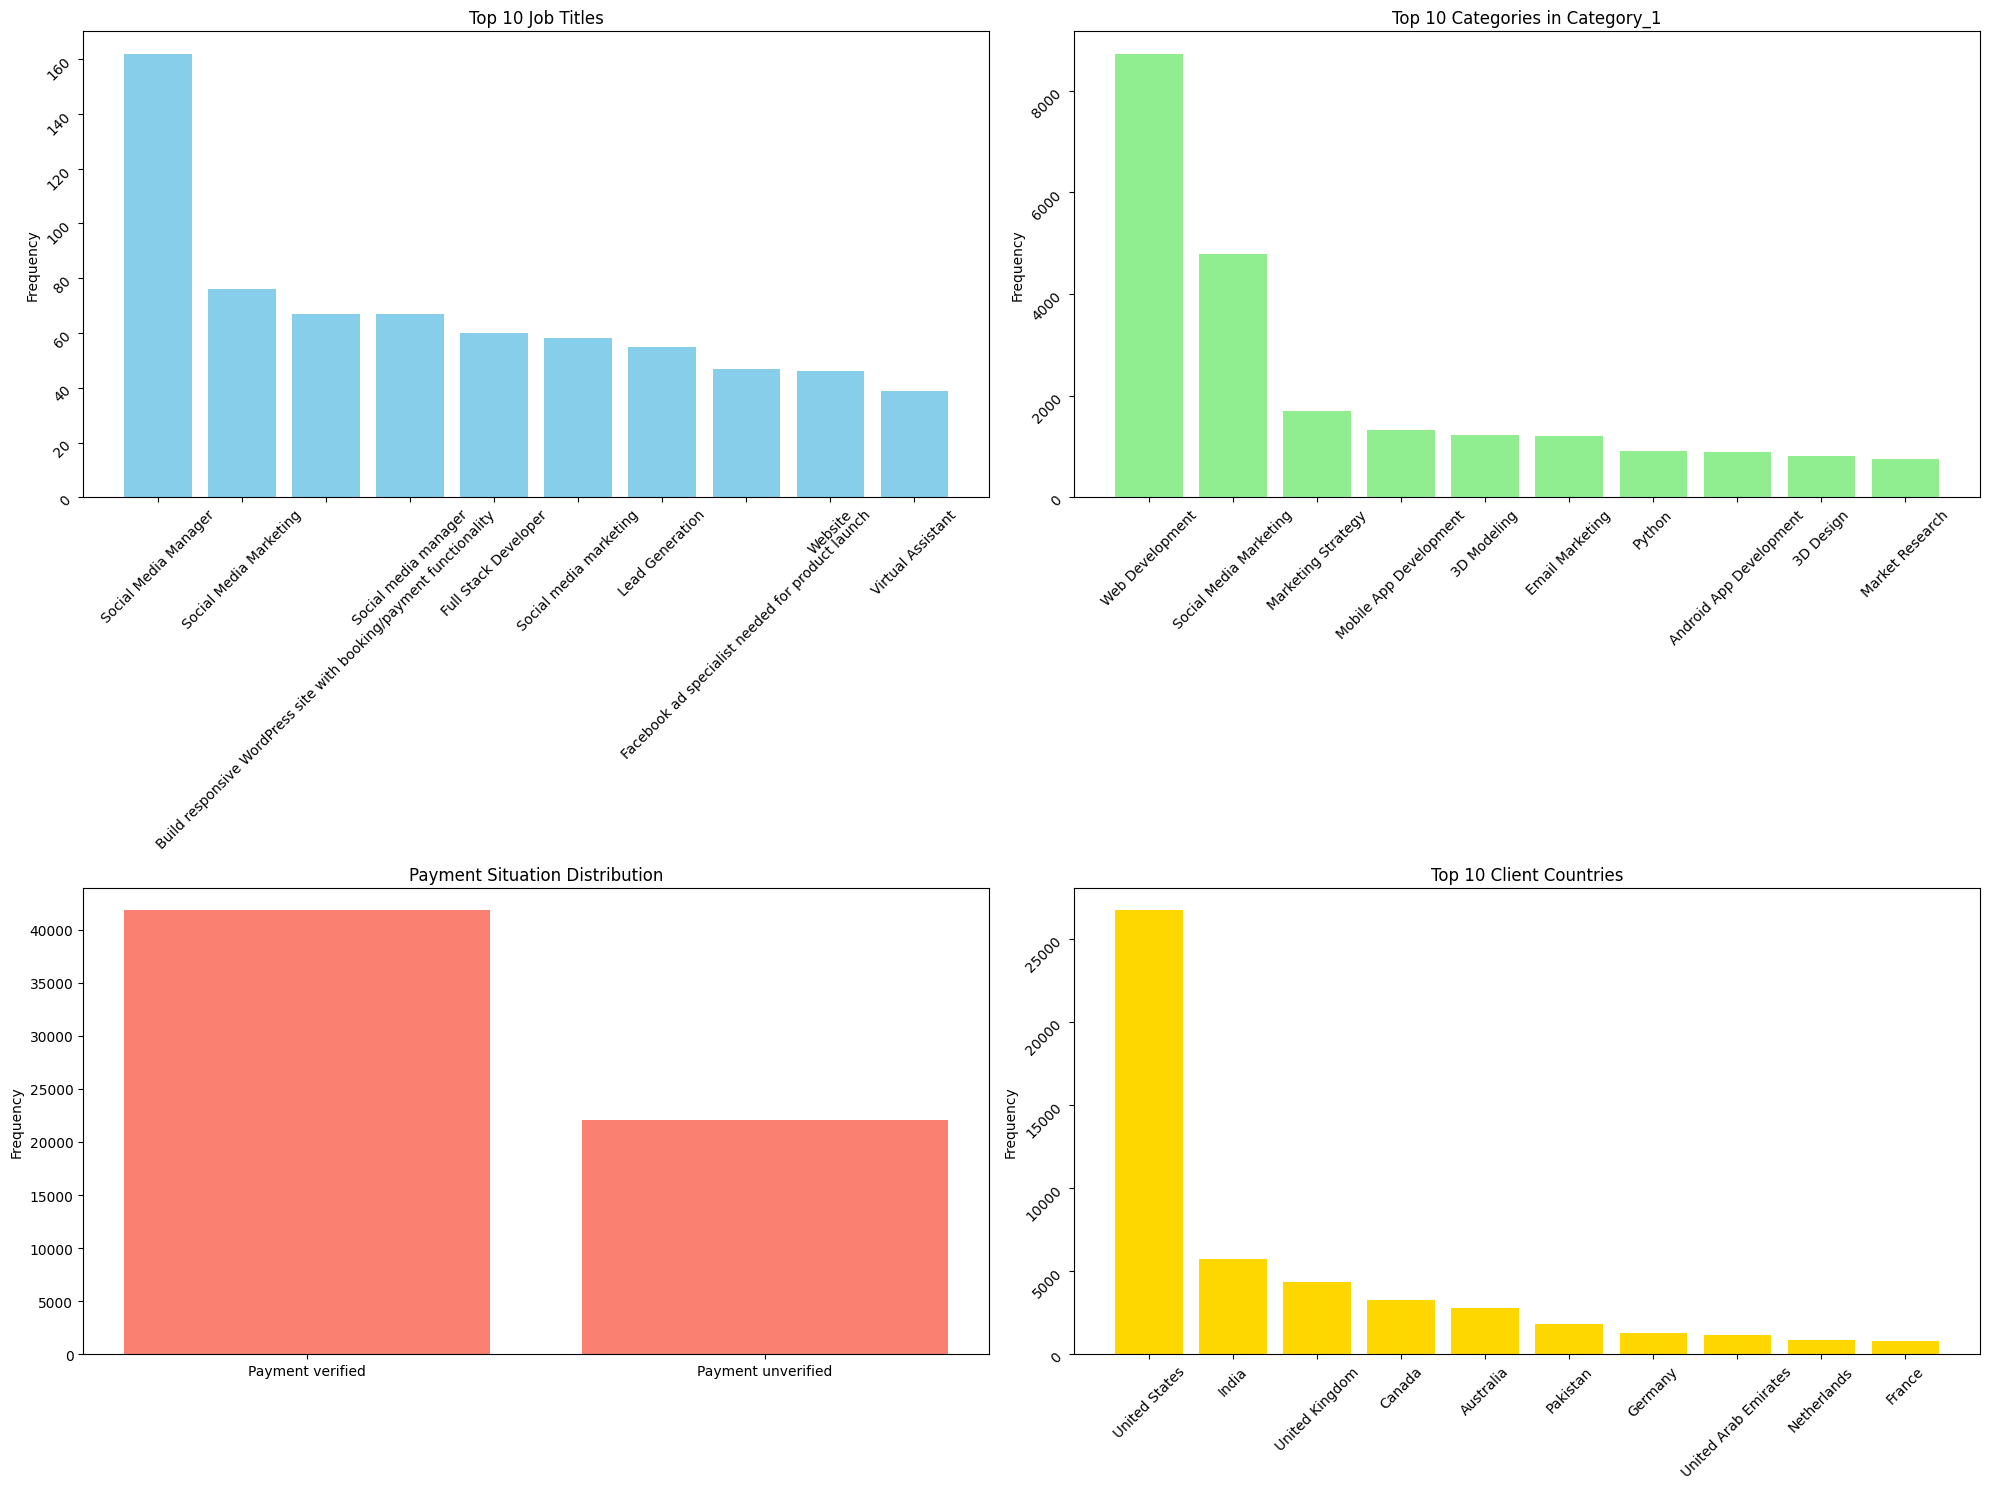

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Plot for Job Titles
axs[0, 0].bar(job_titles_freq.index, job_titles_freq.values, color='skyblue')
axs[0, 0].set_title('Top 10 Job Titles')
axs[0, 0].tick_params(labelrotation=45)
axs[0, 0].set_ylabel('Frequency')

# Plot for Category_1
axs[0, 1].bar(category_1_freq.index, category_1_freq.values, color='lightgreen')
axs[0, 1].set_title('Top 10 Categories in Category_1')
axs[0, 1].tick_params(labelrotation=45)
axs[0, 1].set_ylabel('Frequency')

# Plot for Payment Type
axs[1, 0].bar(payment_type_freq.index, payment_type_freq.values, color='salmon')
axs[1, 0].set_title('Payment Situation Distribution')
axs[1, 0].set_ylabel('Frequency')

# Plot for Client Country
axs[1, 1].bar(client_country_freq.index, client_country_freq.values, color='gold')
axs[1, 1].set_title('Top 10 Client Countries')
axs[1, 1].tick_params(labelrotation=45)
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


There seems to be features that should be numerical, but are not, like Applicants_num. Plotting them by counting their frequency still shows their distribution.

<Axes: xlabel='Applicants_Num'>

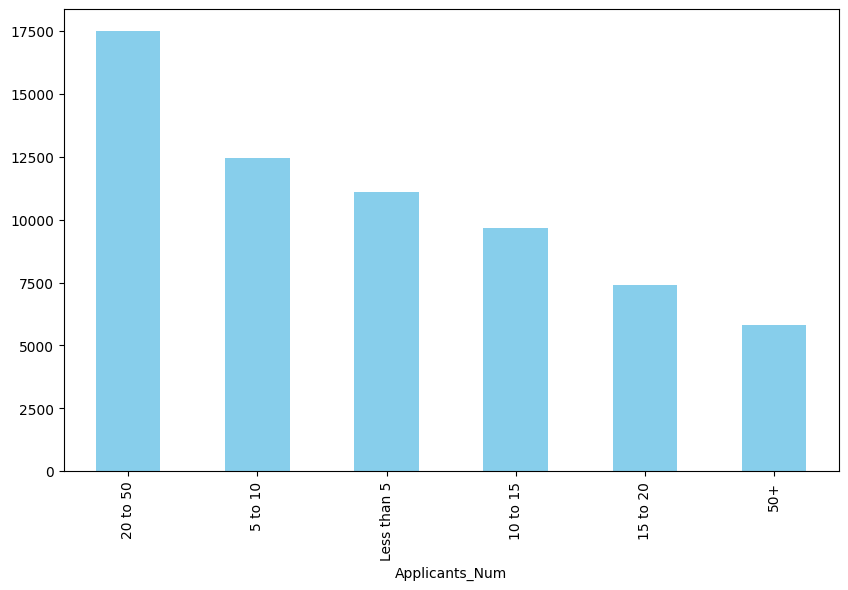

In [9]:
Applicants_num = raw_df['Applicants_Num'].value_counts()
Applicants_num

Applicants_num.plot(kind='bar', figsize=(10, 6), color='skyblue')

In [10]:
raw_df.describe().round(2)

,Freelancers_Num,Spent($),Connects_Num,New_Connects_Num,Rating,Feedback_Num
count,63950.00,62304.00,63949.00,63949.00,30593.00,63949.00
mean,1.14,29997.89,4.51,9.01,4.82,21.00
std,2.39,392651.41,2.10,4.20,0.42,180.45
min,0.00,0.00,1.00,2.00,1.00,0.00
25%,1.00,0.00,2.00,4.00,4.84,0.00
50%,1.00,80.00,4.00,8.00,4.98,0.00
75%,1.00,4000.00,6.00,12.00,5.00,10.00
max,99.00,70000000.00,8.00,16.00,5.00,12541.00


# Feature reduction

I will only keep the columns that are relevant for this project's current scope, plus some other columns that could be useful for the future.

The columns that will be kept are:

- Job Title
- Expertise level demandes 
- Job Description
- Job categories
- Applicant numbers
- New connect numbers
- Money spent

In [11]:
tiny_df = raw_df[['Job Title', 'EX_level_demand', 'Description', 'Category_1', 'Category_2', 'Category_3', 'Applicants_Num', 'New_Connects_Num', 'Spent($)']]

In [12]:
tiny_df.isna().sum()

Job Title              2
EX_level_demand     7015
Description            2
Category_1           445
Category_2          4061
Category_3          8953
Applicants_Num         1
New_Connects_Num       1
Spent($)            1646
dtype: int64

Since only 2 Descriptions and 445 Categories are missing whereas other categories are missing in the thousands, I will make the trade-off of dropping most columns other that the main ones, and dropping the NaNs of those filtered columns.

In [42]:
tiny_df = raw_df[['Job Title', 'Description', 'Category_1']]

In [43]:
tiny_df.dropna(inplace=True)

C:\Users\pat laptop\AppData\Local\Temp\ipykernel_3068\3903604075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiny_df.dropna(inplace=True)


this leaves us with the following columns:

In [13]:
tiny_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63950 entries, 0 to 63949
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Job Title         63948 non-null  object 
 1   EX_level_demand   56935 non-null  object 
 2   Description       63948 non-null  object 
 3   Category_1        63505 non-null  object 
 4   Category_2        59889 non-null  object 
 5   Category_3        54997 non-null  object 
 6   Applicants_Num    63949 non-null  object 
 7   New_Connects_Num  63949 non-null  float64
 8   Spent($)          62304 non-null  float64
dtypes: float64(2), object(7)
memory usage: 4.4+ MB


Not it's time to export the data to a new csv, so that the analysis can be carried out with the specific models.

In [14]:
tiny_df.to_csv('full.csv', index=False)